# Machine Learning in Python - Project 2

Due Friday, April 12th by 4 pm.

*Include contributors names in notebook metadata or here*

## Setup

*Install any packages here and load data*

In [270]:
#install
!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 5.2 MB/s eta 0:00:00a 0:00:01


In [276]:
# Add any additional libraries or submodules below
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Data libraries
import pandas as pd
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting defaults
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 80

# sklearn modules
import sklearn

In [216]:
# Load data in easyshare.csv
d = pd.read_csv("freddiemac.csv")
d.head()

,fico,dt_first_pi,flag_fthb,dt_matr,cd_msa,mi_pct,cnt_units,occpy_sts,cltv,dti,...,zipcode,id_loan,loan_purpose,orig_loan_term,cnt_borr,seller_name,servicer_name,flag_sc,prepaid,default
0,709.0,201703,9,204702,NaN,12,1,P,84,26,...,51300,F117Q1000376,N,360,2,Other sellers,Other servicers,NaN,0,1
1,649.0,201703,9,203202,33124.0,0,1,P,52,22,...,33100,F117Q1000418,C,180,2,Other sellers,Other servicers,NaN,1,0
2,747.0,201703,9,203702,41180.0,0,1,I,43,20,...,63100,F117Q1000479,N,240,2,Other sellers,Other servicers,NaN,1,0
3,711.0,201703,9,204702,20260.0,0,1,I,80,21,...,55800,F117Q1000523,P,360,2,Other sellers,Other servicers,NaN,1,0
4,751.0,201703,N,204702,NaN,35,1,P,95,24,...,75900,F117Q1000719,P,360,1,Other sellers,ARVESTCENTRALMTGECO,NaN,1,0


In [217]:
d.mi_pct.value_counts()

0     4884
30     650
25     342
12     204
6       22
35       1
20       1
Name: mi_pct, dtype: int64

# Introduction

*This section should include a brief introduction to the task and the data (assume this is a report you are delivering to a professional body (e.g. FreddiMac company or similar company). If you use any additional data sources, you should introduce them here and discuss why they were included.*

*Briefly outline the approaches being used and the conclusions that you are able to draw.*

# Exploratory Data Analysis and Feature Engineering

*Include a detailed discussion of the data with a particular emphasis on the features of the data that are relevant for the subsequent modeling. Including visualizations of the data is strongly encouraged - all code and plots must also be described in the write up. Think carefully about whether each plot needs to be included in your final draft - your report should include figures but they should be as focused and impactful as possible.*

*You should also split your data into training and testing sets, ideally before you look to much into the features and relationships with the target*

*Additionally, this section should also implement and describe any preprocessing / feature engineering of the data. Specifically, this should be any code that you use to generate new columns in the data frame `d`. Feature engineering that will be performed as part of an sklearn pipeline can be mentioned here but should be implemented in the following section.*

*If you decide to extract additional features from the full data (easyshare_all.csv), describe these variables here.*

*All code and figures should be accompanied by text that provides an overview / context to what is being done or presented.*

In [218]:
#encode missing codes with NA
d.loc[d["flag_fthb"] == "9", "flag_fthb"] = float("nan")
#d.loc[d["mi_pct"] == 999, "mi_pct"] = float("nan")
d.loc[d["cltv"] == 999, "cltv"] = float("nan")
d.loc[d["dti"] == 999, "dti"] = float("nan")
d.loc[d["ltv"] == 999, "ltv"] = float("nan")

In [219]:
#to remove
d.drop(columns=['ppmt_pnlty', 'prod_type', 'prepaid'], inplace = True)
#ppmt_pnlty 'N'
#prod_type 'FRM'

#convert nan to 'N'
d.loc[d["flag_sc"].isna(), "flag_sc"] = "N"

In [233]:
#split year and month and create new columns

d["year_first_pi"] = [int(str(i)[0:4]) for i in d["dt_first_pi"]]
d["month_first_pi"] = [int(str(i)[4:]) for i in d["dt_first_pi"]]

d["year_matr"] = [int(str(i)[0:4]) for i in d["dt_matr"]]
d["month_matr"] = [int(str(i)[4:]) for i in d["dt_matr"]]

#drop the original columns
d.drop(columns=['dt_first_pi', 'dt_matr'], inplace = True)

In [234]:
d

,fico,flag_fthb,cd_msa,mi_pct,cnt_units,occpy_sts,cltv,dti,orig_upb,ltv,...,orig_loan_term,cnt_borr,seller_name,servicer_name,flag_sc,default,year_first_pi,month_first_pi,year_matr,month_matr
0,709.0,NaN,NaN,12,1,P,84.0,26.0,310000,84.0,...,360,2,Other sellers,Other servicers,N,1,2017,3,2047,2
1,649.0,NaN,33124.0,0,1,P,52.0,22.0,190000,52.0,...,180,2,Other sellers,Other servicers,N,0,2017,3,2032,2
2,747.0,NaN,41180.0,0,1,I,43.0,20.0,61000,43.0,...,240,2,Other sellers,Other servicers,N,0,2017,3,2037,2
3,711.0,NaN,20260.0,0,1,I,80.0,21.0,90000,80.0,...,360,2,Other sellers,Other servicers,N,0,2017,3,2047,2
4,751.0,N,NaN,35,1,P,95.0,24.0,112000,95.0,...,360,1,Other sellers,ARVESTCENTRALMTGECO,N,0,2017,3,2047,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6099,725.0,NaN,41500.0,0,1,P,59.0,40.0,160000,59.0,...,360,2,"WELLSFARGOBANK,NA","WELLSFARGOBANK,NA",N,0,2018,11,2048,10
6100,768.0,Y,31084.0,0,1,P,79.0,46.0,500000,79.0,...,360,2,"STEARNSLENDING,LLC",Other servicers,Y,0,2018,9,2048,8
6101,752.0,NaN,39900.0,0,1,I,80.0,12.0,213000,80.0,...,180,2,Other sellers,Other servicers,N,0,2018,11,2033,10
6102,777.0,N,31084.0,0,1,P,80.0,48.0,238000,80.0,...,360,1,AMERIHOMEMTGECOMPANY,AMERIHOMEMTGECOMPANY,N,0,2018,11,2048,10


In [235]:
d[~d.isnull().any(axis=1)].default.value_counts()

0    2366
1      34
Name: default, dtype: int64

In [236]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6104 entries, 0 to 6103
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fico            6103 non-null   float64
 1   flag_fthb       2636 non-null   object 
 2   cd_msa          5510 non-null   float64
 3   mi_pct          6104 non-null   int64  
 4   cnt_units       6104 non-null   int64  
 5   occpy_sts       6104 non-null   object 
 6   cltv            6103 non-null   float64
 7   dti             6103 non-null   float64
 8   orig_upb        6104 non-null   int64  
 9   ltv             6103 non-null   float64
 10  int_rt          6104 non-null   float64
 11  channel         6104 non-null   object 
 12  st              6104 non-null   object 
 13  prop_type       6104 non-null   object 
 14  zipcode         6104 non-null   int64  
 15  id_loan         6104 non-null   object 
 16  loan_purpose    6104 non-null   object 
 17  orig_loan_term  6104 non-null   i

In [237]:
df_clean = d.drop(columns = ["flag_fthb"])

In [257]:
df_clean = df_clean[~df_clean.isnull().any(axis=1)]

In [258]:
df_clean.default.value_counts()

0    5419
1      88
Name: default, dtype: int64

In [226]:
88/(5419+88)

0.01597966224804794

In [266]:
#split the data
data_x, data_y = df_clean.drop(['default'], axis=1), df_clean['default']

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.2, random_state=42, stratify=data_y)

In [267]:
y_train.value_counts()

0    4335
1      70
Name: default, dtype: int64

In [268]:
y_test.value_counts()

0    1084
1      18
Name: default, dtype: int64

In [240]:
#columns names
col_names = list(df_clean.columns)
col_names.remove("default")

In [241]:
#define train dataset
df_train = pd.DataFrame(X_train, columns = col_names)
df_train["default"] = y_train

In [ ]:
#EDA
#fun map with cd_msa and color depending on the count

<Axes: xlabel='default', ylabel='fico'>

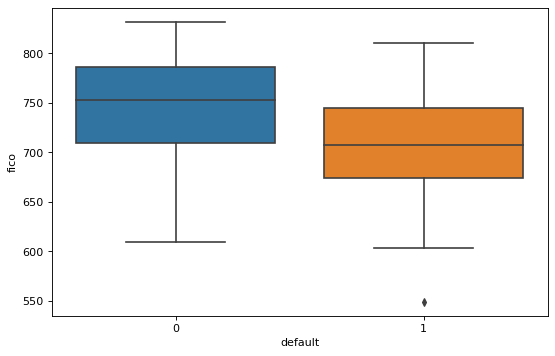

In [242]:
sns.boxplot(df_train, x = "default", y = "fico")

/tmp/ipykernel_137/2489043797.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(), ax = ax)


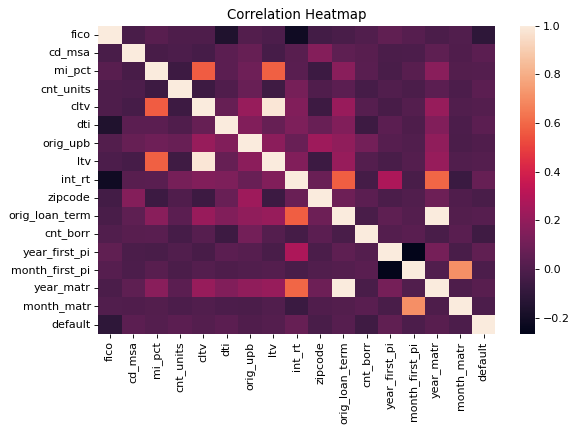

In [245]:
ax = plt.axes()
sns.heatmap(df_train.corr(), ax = ax)

ax.set_title('Correlation Heatmap')
plt.show()

In [250]:
df_train.corr()["default"].sort_values()

/tmp/ipykernel_137/4028883738.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.corr()["default"].sort_values()


fico             -0.107062
cnt_borr         -0.054662
zipcode          -0.022687
month_matr       -0.009594
month_first_pi   -0.009176
orig_upb         -0.001933
mi_pct            0.012166
ltv               0.013045
cltv              0.013312
orig_loan_term    0.018893
year_matr         0.022695
cnt_units         0.031531
dti               0.031981
cd_msa            0.032007
year_first_pi     0.049087
int_rt            0.070045
default           1.000000
Name: default, dtype: float64

In [251]:
df_train.corr(method = "kendall")["default"].sort_values()

/tmp/ipykernel_137/172650402.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.corr(method = "kendall")["default"].sort_values()


fico             -0.082270
cnt_borr         -0.054662
zipcode          -0.017477
month_matr       -0.007054
month_first_pi   -0.006582
orig_upb         -0.002508
ltv               0.006280
cltv              0.006673
mi_pct            0.013634
orig_loan_term    0.019259
cd_msa            0.026155
dti               0.029756
cnt_units         0.038618
year_matr         0.044122
year_first_pi     0.049165
int_rt            0.055204
default           1.000000
Name: default, dtype: float64

In [252]:
df_train.corr(method = "spearman")["default"].sort_values()

/tmp/ipykernel_137/2166513627.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.corr(method = "spearman")["default"].sort_values()


fico             -0.100436
cnt_borr         -0.054662
zipcode          -0.021362
month_matr       -0.008257
month_first_pi   -0.007704
orig_upb         -0.003066
ltv               0.007414
cltv              0.007878
mi_pct            0.014050
orig_loan_term    0.019658
cd_msa            0.031847
dti               0.035866
cnt_units         0.038717
year_matr         0.046924
year_first_pi     0.049169
int_rt            0.065532
default           1.000000
Name: default, dtype: float64

In [ ]:
df_train

In [253]:
df_train['default'].value_counts()

0    5386
1     107
Name: default, dtype: int64

In [197]:
df_train

,fico,dt_first_pi,dt_matr,cd_msa,mi_pct,cnt_units,occpy_sts,cltv,dti,orig_upb,...,cnt_borr,seller_name,servicer_name,flag_sc,prepaid,year_first_pi,month_first_pi,year_matr,month_matr,default
0,790.0,201706,204705,47664.0,0,1,P,80.0,19.0,147000,...,2,UNITEDSHOREFINANCIAL,Other servicers,N,1,2017,6,2047,5,1.0
1,620.0,201710,203209,NaN,0,1,P,70.0,32.0,80000,...,1,Other sellers,Other servicers,N,1,2017,10,2032,9,0.0
2,763.0,201707,204706,13900.0,0,1,P,80.0,37.0,288000,...,2,"CALIBERHOMELOANS,INC","CALIBERHOMELOANS,INC",N,1,2017,7,2047,6,0.0
3,734.0,201703,204702,NaN,0,1,P,49.0,45.0,220000,...,1,Other sellers,Other servicers,N,0,2017,3,2047,2,0.0
4,757.0,201801,204712,41740.0,0,1,P,50.0,48.0,424000,...,2,"WELLSFARGOBANK,NA","WELLSFARGOBANK,NA",N,1,2018,1,2047,12,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5488,733.0,201711,203710,37964.0,0,2,I,70.0,30.0,133000,...,2,"WELLSFARGOBANK,NA","WELLSFARGOBANK,NA",N,1,2017,11,2037,10,0.0
5489,791.0,201805,204804,40420.0,0,1,P,42.0,49.0,190000,...,2,Other sellers,Other servicers,N,1,2018,5,2048,4,0.0
5490,641.0,201805,204804,35614.0,0,3,P,75.0,42.0,649000,...,2,"LOANDEPOTCOM,LLC",Other servicers,N,1,2018,5,2048,4,0.0
5491,665.0,201807,204806,NaN,0,1,P,71.0,42.0,170000,...,2,Other sellers,Other servicers,N,0,2018,7,2048,6,0.0


In [ ]:
#convert X_train to a matrix
X_train = X_train.values

In [273]:
#Oversample the train set, leave the test/valid sets as they are
oversample = RandomOverSampler(sampling_strategy='minority')
X_otrain, y_otrain = oversample.fit_resample(X_train, y_train)

In [ ]:
#Undersample the train set, leave the test/valid sets as they are
undersample = RandomUnderSampler(sampling_strategy='majority')
X_utrain, y_utrain = undersample.fit_resample(X_train, y_train)

In [275]:
y_train.value_counts()

0    4335
1    4335
Name: default, dtype: int64

# Model Fitting and Tuning

*In this section you should detail your choice of model and describe the process used to refine and fit that model. You are strongly encouraged to explore many different modeling methods (e.g. linear regression, interaction terms, lasso, etc.) but you should not include a detailed narrative of all of these attempts. At most this section should mention the methods explored and why they were rejected - most of your effort should go into describing the model you are using and your process for tuning and validating it.*

*For example if you considered a linear regression model, a polynomial regression, and a lasso model and ultimately settled on the linear regression approach then you should mention that other two approaches were tried but do not include any of the code or any in depth discussion of these models beyond why they were rejected. This section should then detail is the development of the linear regression model in terms of features used, interactions considered, and any additional tuning and validation which ultimately led to your final model.* 

*This section should also include the full implementation of your final model, including all necessary validation. As with figures, any included code must also be addressed in the text of the document.*

*Finally, you should also provide comparison of your model with baseline model(s) on the test data but only briefly describe the baseline model(s) considered*

# Discussion & Conclusions

*In this section you should provide a general overview of your final model, its performance, and reliability. You should discuss what the implications of your model are in terms of the included features, predictive performance, and anything else you think is relevant.*

*This should be written with a target audience of a government official or charity directy, who is understands the pressing challenges associated with ageining and dementia but may only have university level mathematics (not necessarily postgraduate statistics or machine learning). Your goal should be to highlight to this audience how your model can useful. You should also mention potential limitations of your model.*

*Finally, you should include recommendations on potential lifestyle changes or governmental/societal interventions to reduce dementia risk.*

*Keep in mind that a negative result, i.e. a model that does not work well predictively, that is well explained and justified in terms of why it failed will likely receive higher marks than a model with strong predictive performance but with poor or incorrect explinations / justifications.*

# References

*Include references if any*

In [ ]:
# Run the following to render to PDF
!jupyter nbconvert --to pdf project2.ipynb

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a2a9ec8d-a343-4210-b36b-f9db26268fc5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>